In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
def fourier(tiempo,voltaje):
    t_max=np.max(tiempo)
    Ts=t_max/len(tiempo)
    Fs=1/Ts
    amplitude=np.abs(np.fft.fft(voltaje))/(len(tiempo)/2)
    F=Fs*np.arange(0,len(voltaje))/len(voltaje)
    return F[0:len(F)//2], amplitude[0:len(F)//2]

In [3]:
def descripcion(data, bins=10, time_name="TIME", voltaje_name="CH1", ylim_serie_temporal=(-0.4, 0.4), ylim_serie_frecuencias=(0,0.005), invertir=False):
    plt.figure(figsize=(18,15))
    decimal=5
    plt.subplot(3,1,1)
    data[voltaje_name].hist(density=True,label="<v>= {} \n std= {}".format(round(data[voltaje_name].mean(),decimal),round(data[voltaje_name].std(),decimal-2)), bins=bins)
    plt.title("Histograma del ruido",fontsize=20)
    plt.xlabel('Voltaje',fontsize=18)
    plt.legend(fontsize=18)


    plt.subplot(3,1,2)
    plt.plot(data[time_name],data[voltaje_name])
    plt.ylim(*ylim_serie_temporal)
    plt.xlabel('tiempo',fontsize=18)
    plt.ylabel("Voltaje",fontsize=18)
    if invertir:
        plt.gca().invert_yaxis()
    plt.title("Ruido puro",fontsize=20)

    plt.subplot(3,1,3)
    frecuencia, amplitud= fourier(data[time_name],data[voltaje_name])
    plt.plot(frecuencia, amplitud)
    plt.ylim(*ylim_serie_frecuencias)
    plt.xlabel('f (Hz)',fontsize=18)
    plt.ylabel("Amplitud",fontsize=18)
    plt.title("Transformada de Fourier del ruido",fontsize=20)

    plt.tight_layout()
    plt.show()

In [4]:
def analisis(file_name, voltaje_name="CH1", bins=10, ylim_serie_temporal=(-0.4,0.4), ylim_serie_frecuencias=(0,0.005), invertir=False):
    data = pd.read_csv(file_name)
    descripcion(data, bins= bins, ylim_serie_temporal=ylim_serie_temporal, ylim_serie_frecuencias=ylim_serie_frecuencias, invertir=invertir)
    statistics = data[voltaje_name].describe()
    print(statistics)
    return statistics, data

# Ejemplo del uso de la fft

In [5]:
f0=10
t_max=0.5
t=np.linspace(0.01,t_max,100)
Ts=t_max/len(t)
Fs=1/Ts
DC_component=10
y=5*np.sin(2*np.pi*f0*t + np.random.random(len(t))) + 3*np.sin(2*np.pi*20*t+ np.random.random(len(t))) + DC_component/2 + np.random.random(len(t))

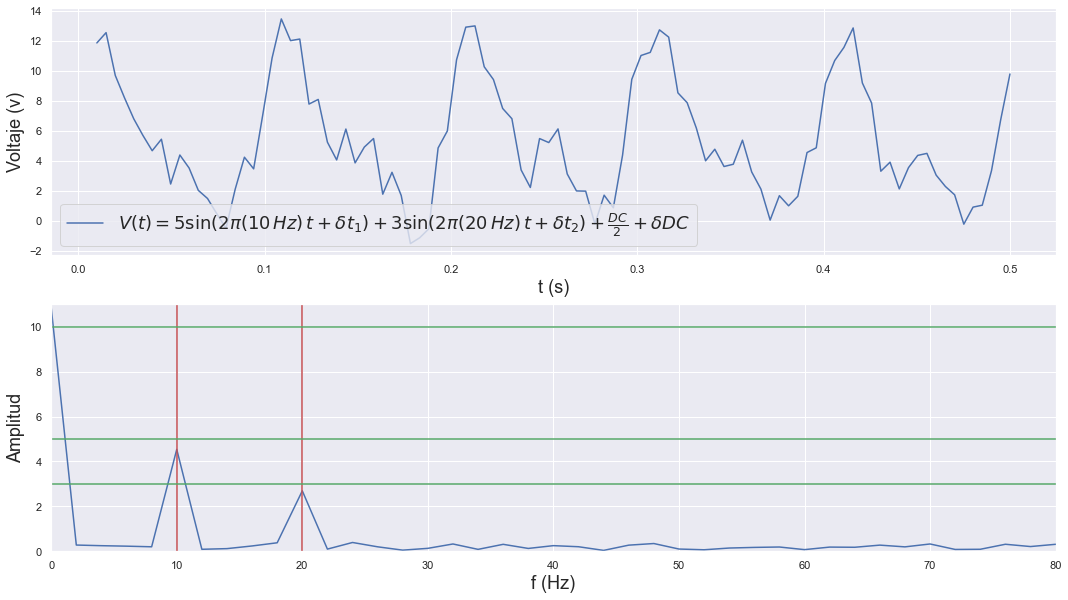

In [31]:
plt.figure(figsize=(18,10))
plt.subplot(2,1,1)
plt.plot(t,y,label=r'$V(t)=5\sin(2\pi (10\,Hz)\, t + \delta t_1)+3\sin(2\pi (20\,Hz)\, t + \delta t_2) + \frac{DC}{2} + \delta DC$')
plt.xlabel("t (s)",fontsize=18)
plt.ylabel("Voltaje (v)",fontsize=18)
plt.legend(fontsize=18)

plt.subplot(2,1,2)

f,a=fourier(t,y)
plt.plot(f,a)
#plt.xlim(0,100)
plt.plot([10,10],[20,0],c='r')
plt.plot([20,20],[20,0],c='r')
plt.plot([0,100],[5,5],c='g')
plt.plot([0,100],[3,3],c='g')
plt.plot([0,100],[10,10],c='g')

plt.xlim(0,80)
plt.ylim(0,11)
plt.xlabel('f (Hz)',fontsize=18)
plt.ylabel("Amplitud",fontsize=18)
plt.savefig("ejemplo_tf.png")
plt.show()


# Ruido cuántico de la práctica de Funciones de Wigner

# Simulación de distintos tipos de ruido

In [5]:
datos_he_ne_ruido_oscuro = pd.read_csv("he_ne_ruido_oscuro.csv")
datos_he_ne_ruido_oscuro.head()

,TIME,CH1
0,-50.00,-0.08
1,-49.99,-0.08
2,-49.98,-0.08
3,-49.97,-0.16
4,-49.96,0.00


# Ruido oscuro

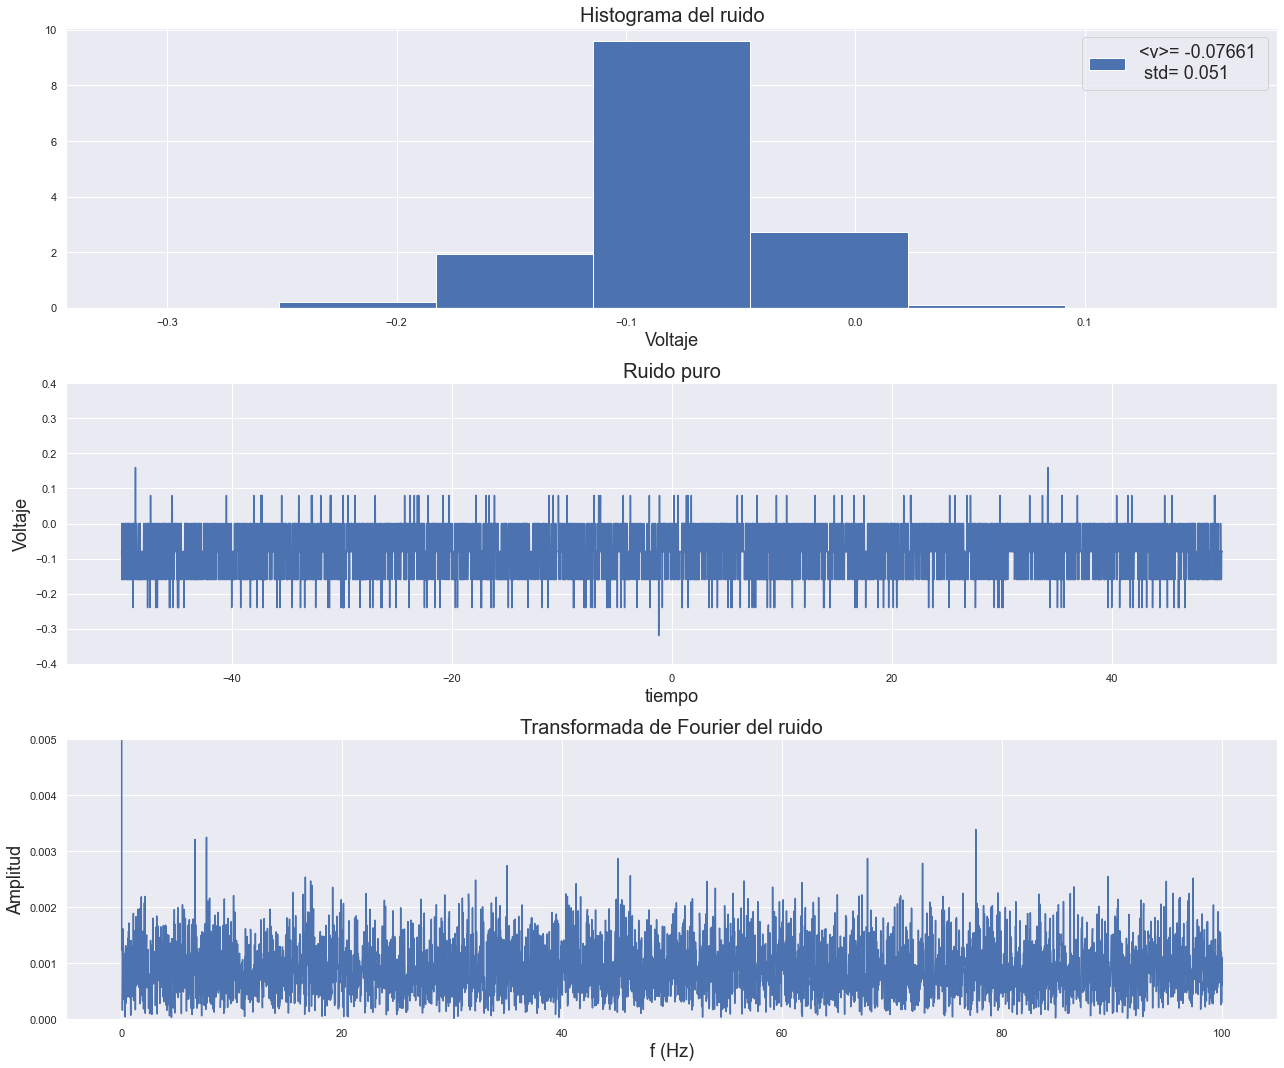

In [6]:
descripcion(datos_he_ne_ruido_oscuro, bins=7)

In [7]:
statistics_dark = datos_he_ne_ruido_oscuro["CH1"].describe()

# Ruido con Laser He-Ne

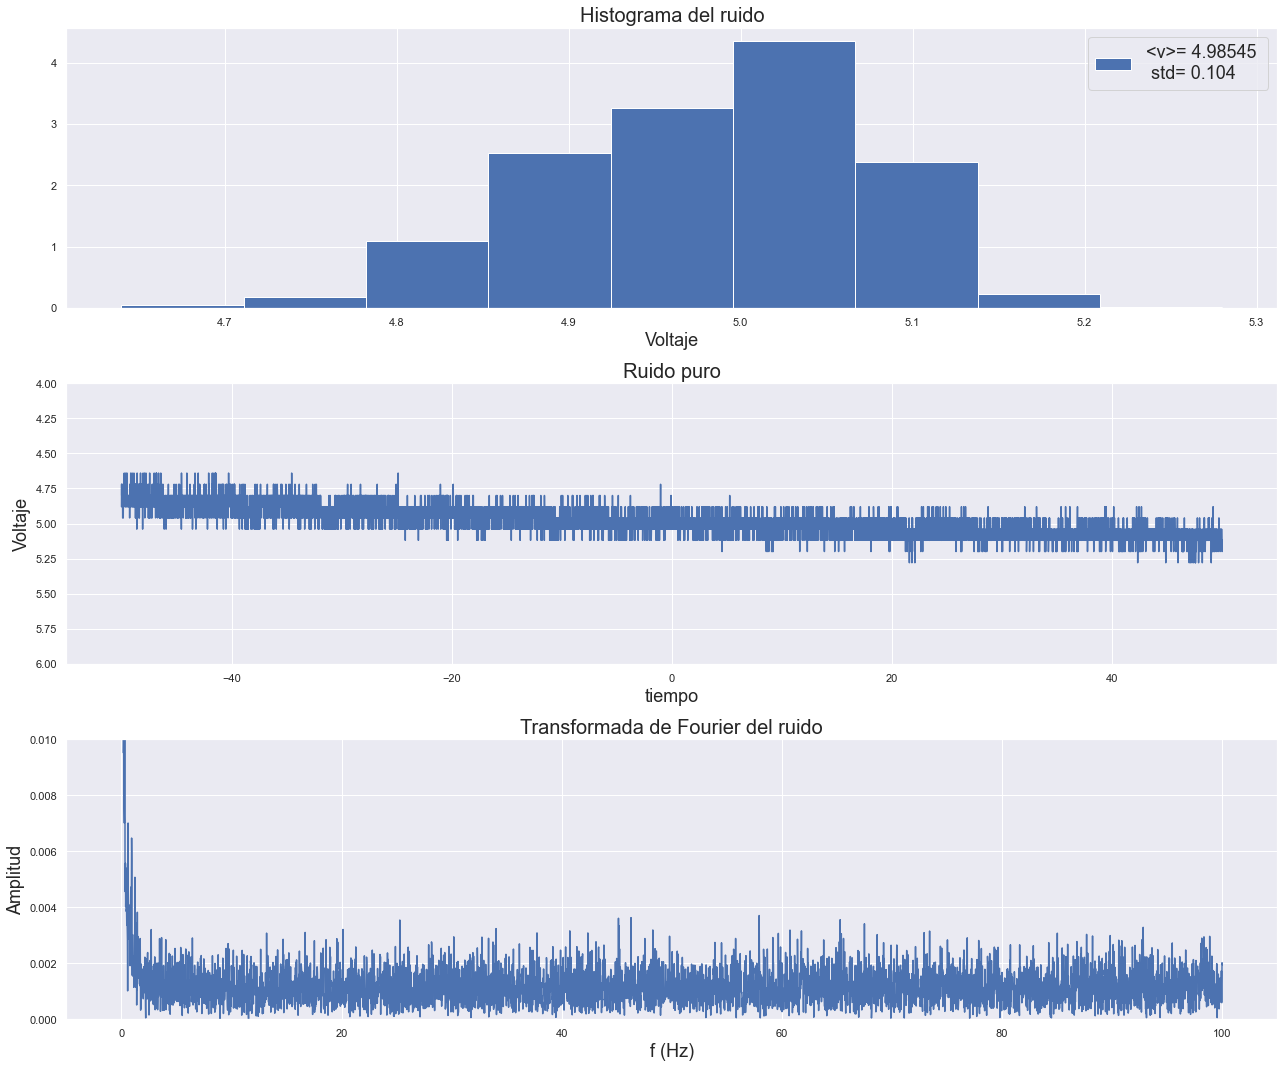

count    10000.000000
mean         4.985448
std          0.104212
min          4.640000
25%          4.880000
50%          4.960000
75%          5.040000
max          5.280000
Name: CH1, dtype: float64


In [8]:
statistics_he_ne, data_he_ne = analisis("he_ne.csv", bins=9, ylim_serie_temporal=(6,4), ylim_serie_frecuencias=(0,0.01))

In [9]:
data_he_ne.head()

,TIME,CH1
0,-50.00,4.88
1,-49.99,4.72
2,-49.98,4.80
3,-49.97,4.72
4,-49.96,4.80


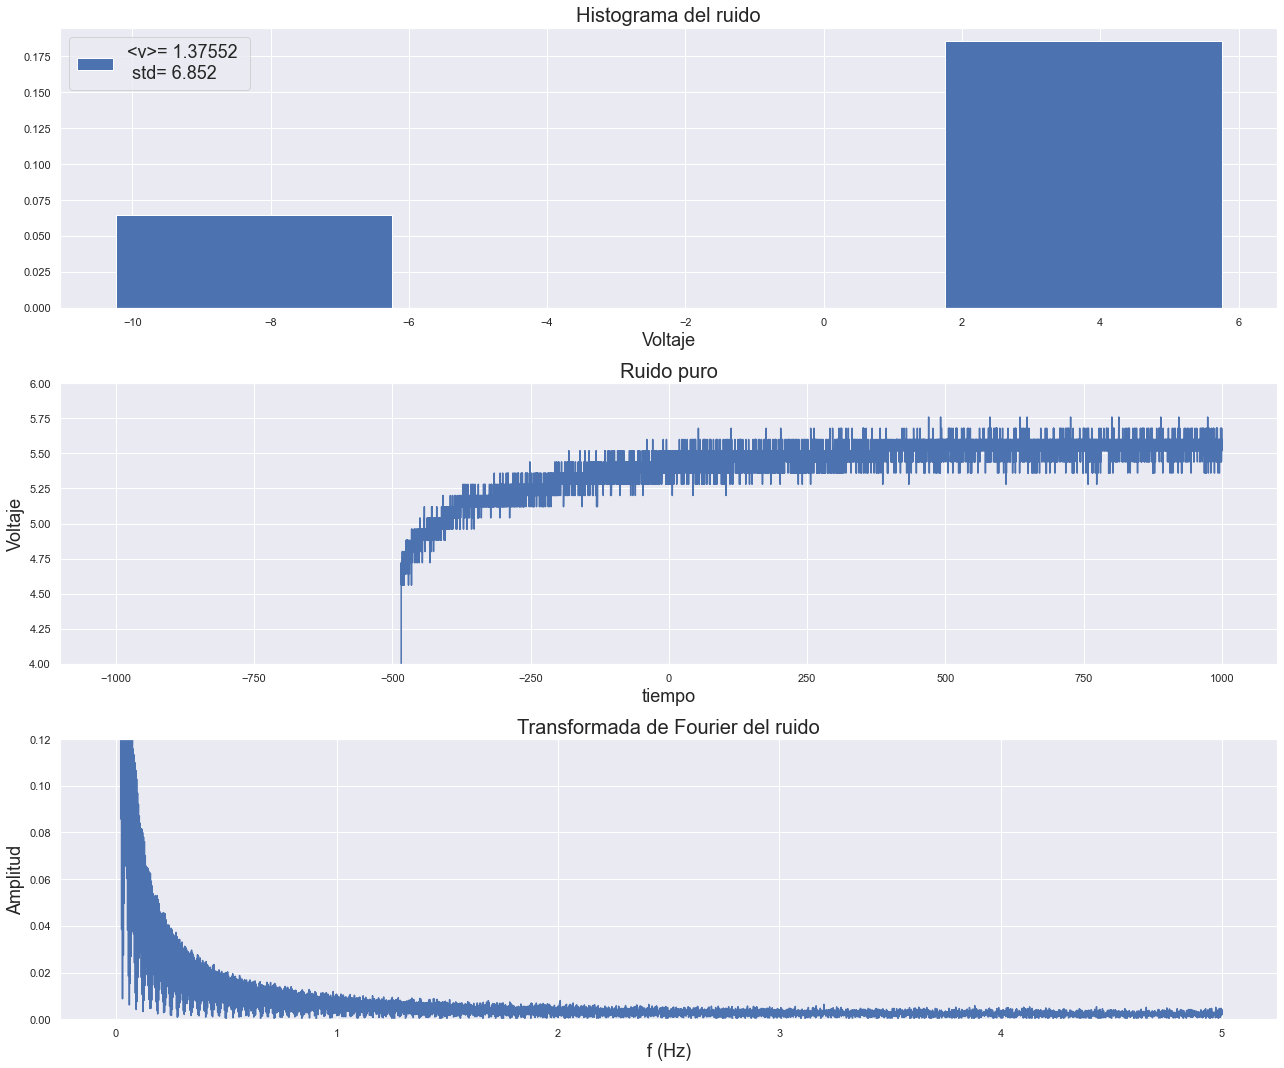

count    10000.000000
mean         1.375520
std          6.851606
min        -10.240000
25%        -10.240000
50%          5.360000
75%          5.520000
max          5.760000
Name: CH1, dtype: float64


In [10]:
statistics_he_ne2, data_he_ne2 = analisis("he_ne_2.csv", bins=4, ylim_serie_temporal=(6,4), ylim_serie_frecuencias=(0,0.12), invertir=True)

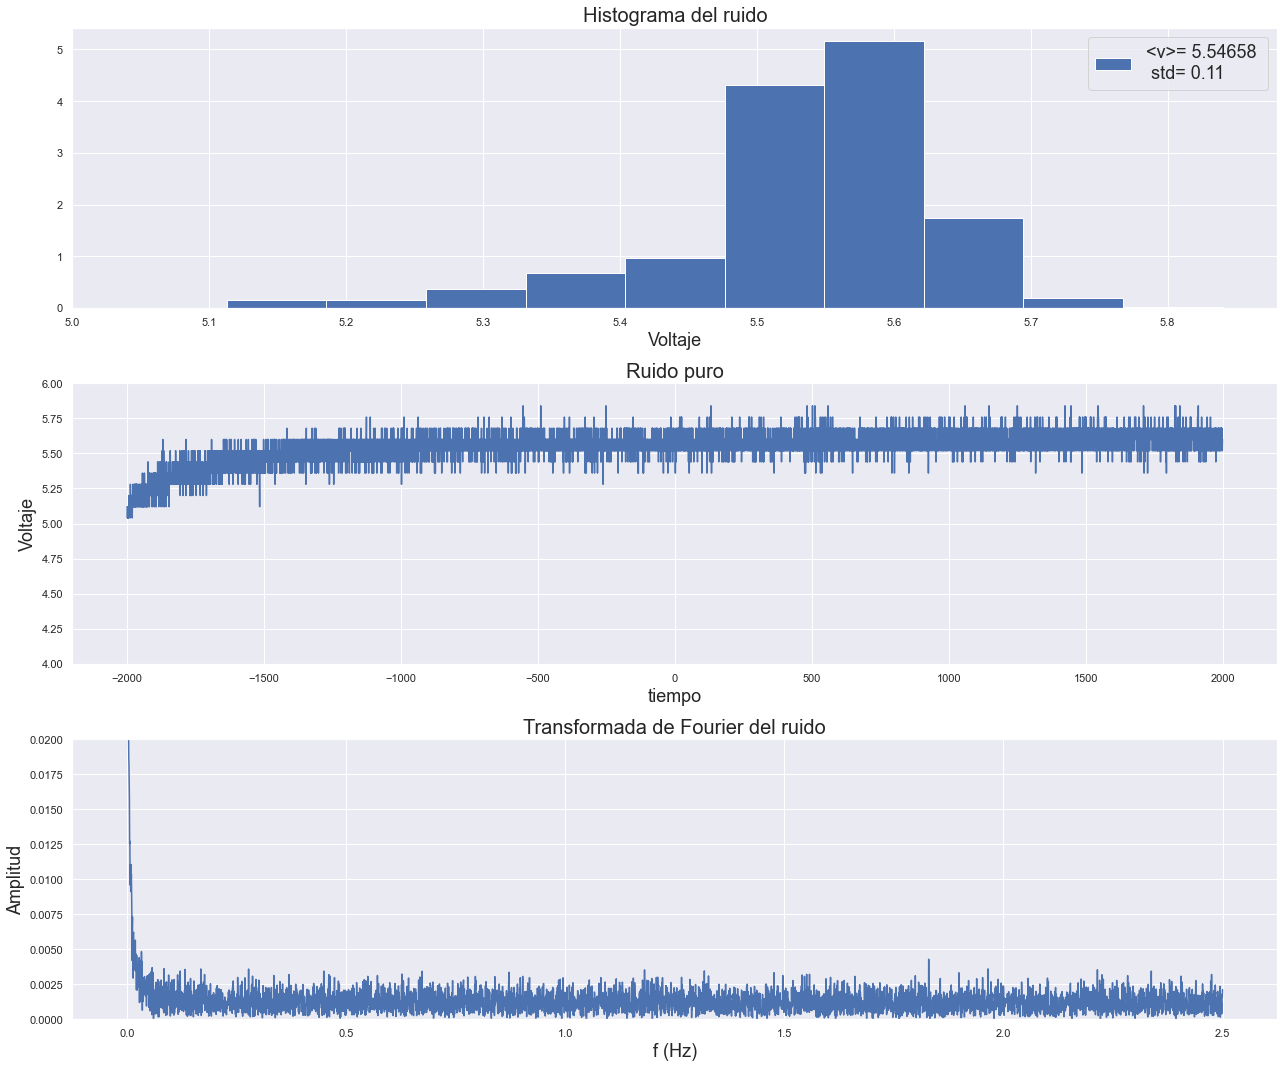

count    10000.000000
mean         5.546584
std          0.110298
min          5.040000
25%          5.520000
50%          5.600000
75%          5.600000
max          5.840000
Name: CH1, dtype: float64


In [11]:
statistics_he_ne_400s, data_he_ne_400s = analisis("he_ne_400s.csv", bins=11, ylim_serie_temporal=(6,4), ylim_serie_frecuencias=(0,0.02), invertir=True)

# Laser He-Ne sin ruido ambiental.

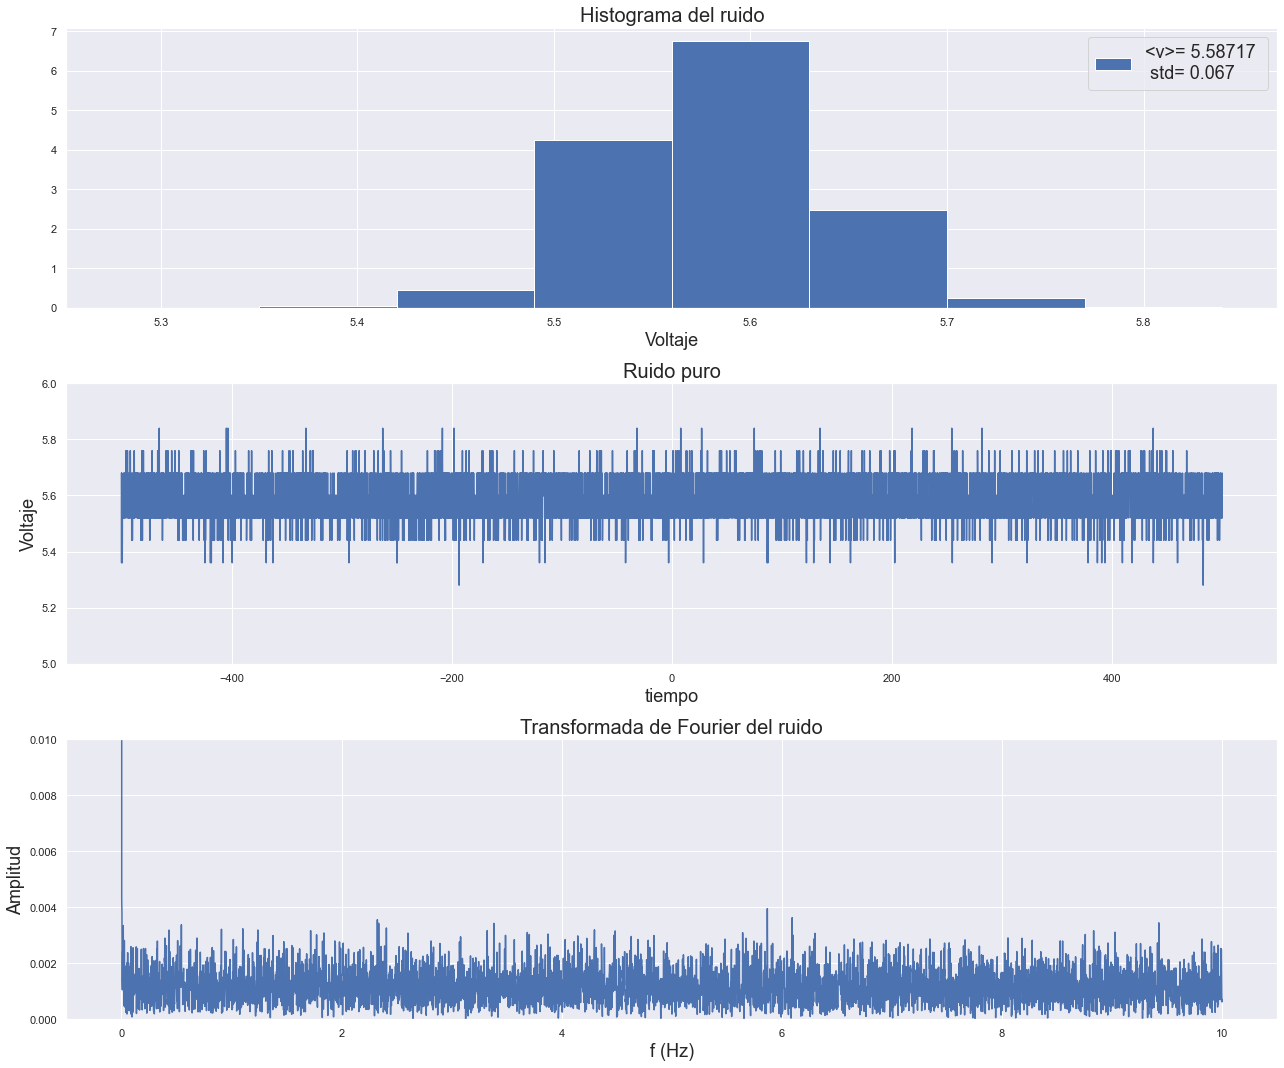

count    10000.000000
mean         5.587168
std          0.066882
min          5.280000
25%          5.520000
50%          5.600000
75%          5.600000
max          5.840000
Name: CH1, dtype: float64


In [12]:
statistics_he_ne_100s_sin_ruido_ambiental, data_he_ne_100s_sin_ruido_ambiental = analisis("he_ne_100s_sin_ruido_ambiental.csv", 
                                                                                         bins=8, 
                                                                                         ylim_serie_temporal=(5,6), 
                                                                                         ylim_serie_frecuencias=(0,0.01), 
                                                                                         )

# Laser He-Ne con ruido ambiental.

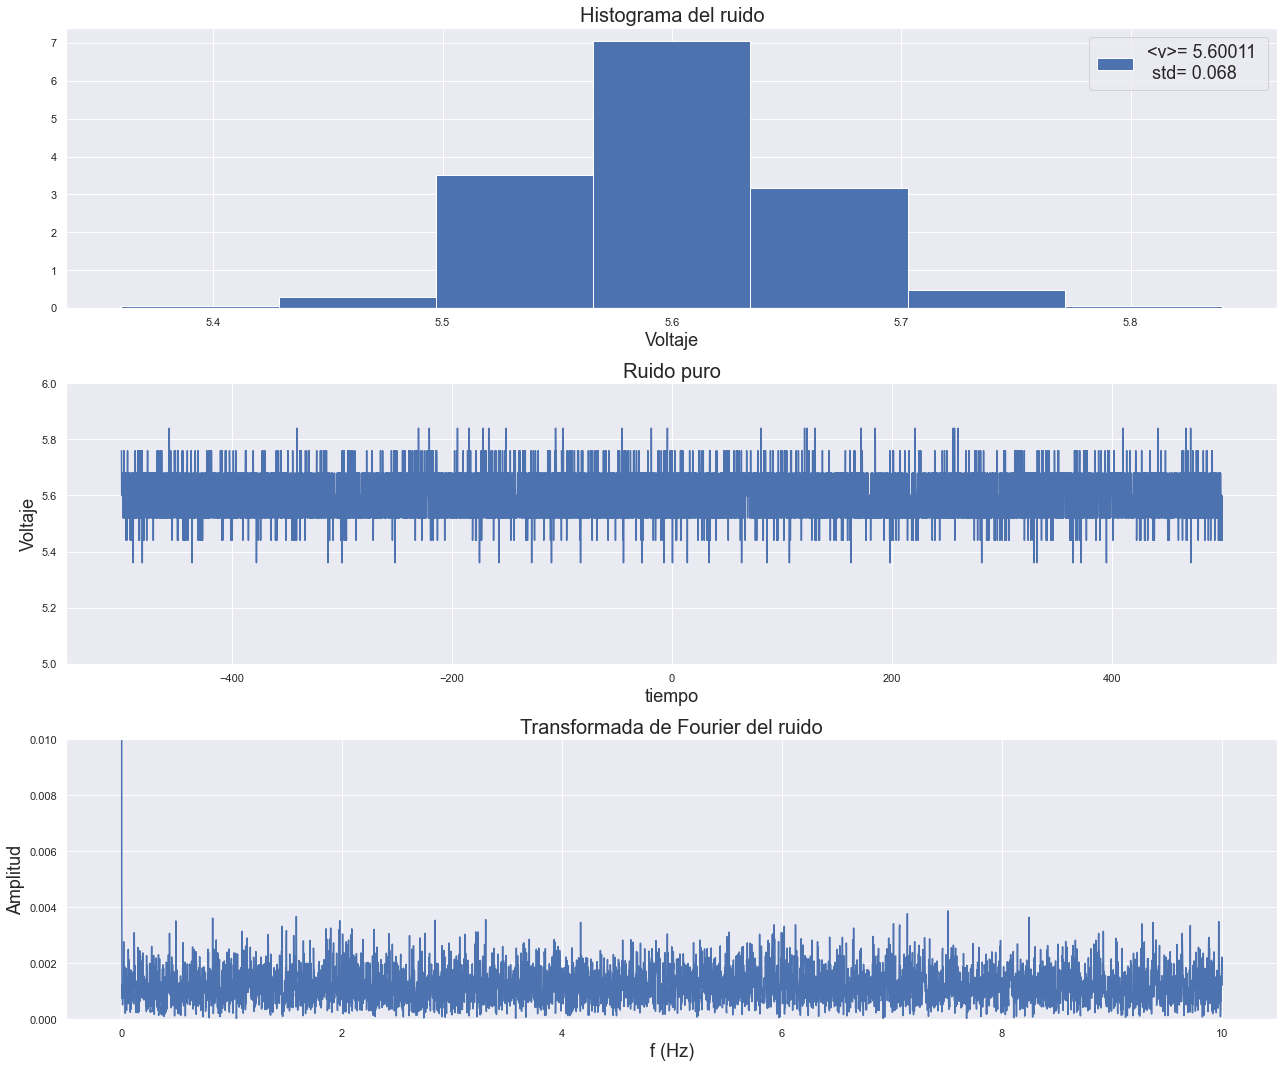

count    10000.000000
mean         5.600112
std          0.068130
min          5.360000
25%          5.520000
50%          5.600000
75%          5.680000
max          5.840000
Name: CH1, dtype: float64
count    10000.000000
mean         5.587168
std          0.066882
min          5.280000
25%          5.520000
50%          5.600000
75%          5.600000
max          5.840000
Name: CH1, dtype: float64


In [13]:
statistics_he_ne_100s_con_ruido_ambiental, data_he_ne_100s_con_ruido_ambiental = analisis("he_ne_100s_con_ruido_ambiental.csv", 
                                                                                         bins=7, 
                                                                                         ylim_serie_temporal=(5,6), 
                                                                                         ylim_serie_frecuencias=(0,0.01), 
                                                                                         )
print(statistics_he_ne_100s_sin_ruido_ambiental)

# Pseudo-térmica con ruido ambiental

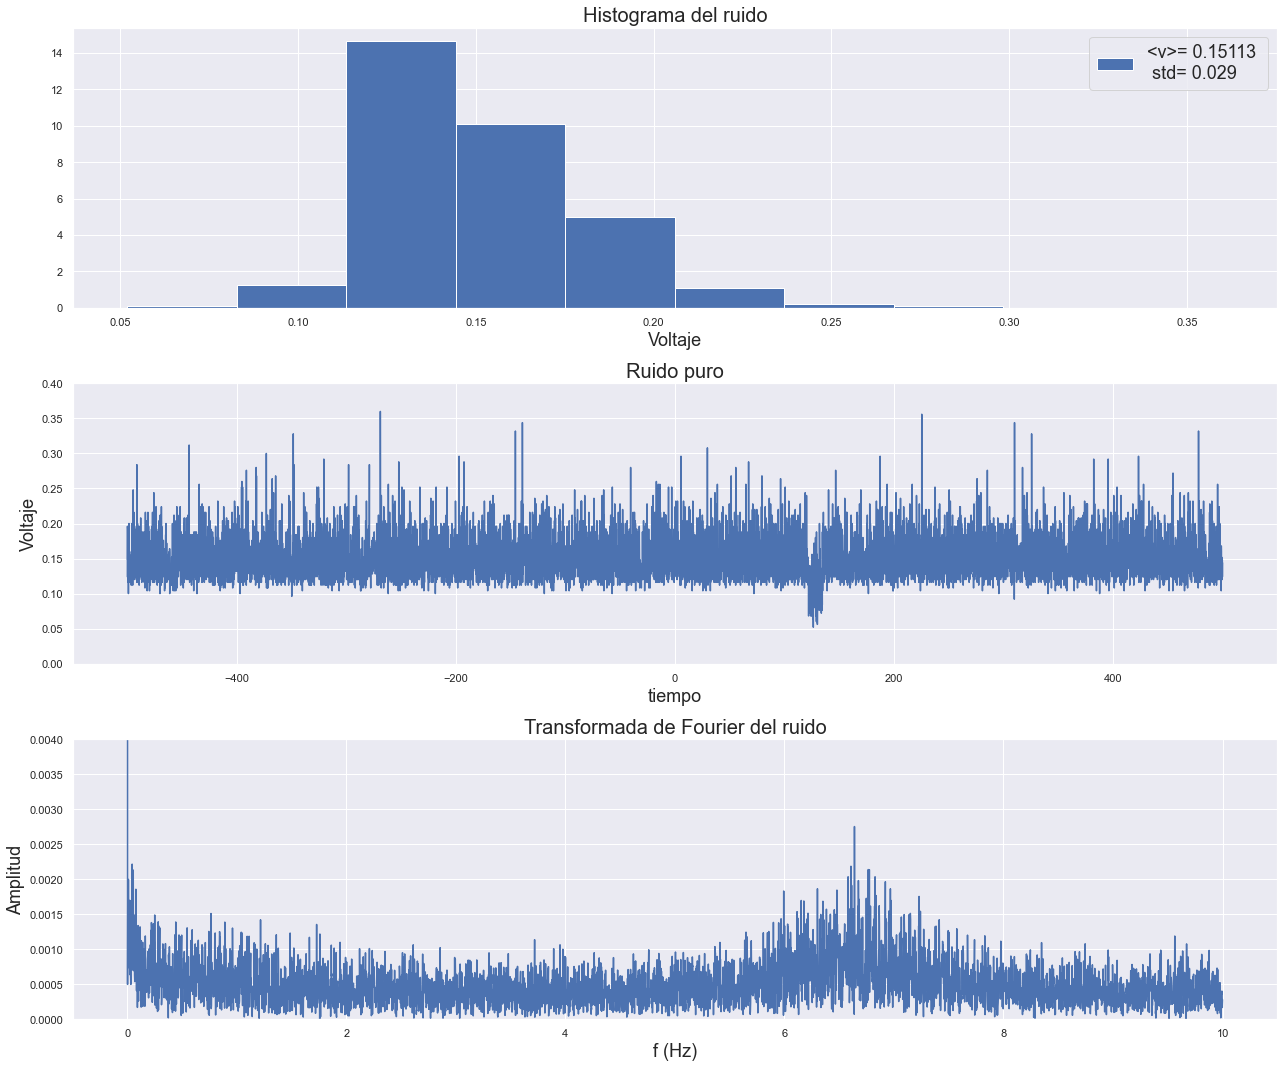

count    10000.00000
mean         0.15113
std          0.02908
min          0.05200
25%          0.13200
50%          0.14800
75%          0.16800
max          0.36000
Name: CH1, dtype: float64
count    10000.00000
mean         0.15113
std          0.02908
min          0.05200
25%          0.13200
50%          0.14800
75%          0.16800
max          0.36000
Name: CH1, dtype: float64


In [14]:
statistics_pseudotermica_100s_con_ruido_ambiental, data_pseudotermica_100s_con_ruido_ambiental = analisis("pseudotermica_100s_con_ruido_ambiental.csv", 
                                                                                         bins=10, 
                                                                                         ylim_serie_temporal=(0,0.4), 
                                                                                         ylim_serie_frecuencias=(0,0.004), 
                                                                                         )
print(statistics_pseudotermica_100s_con_ruido_ambiental)

# Pseudo-térmica sin ruido ambiental

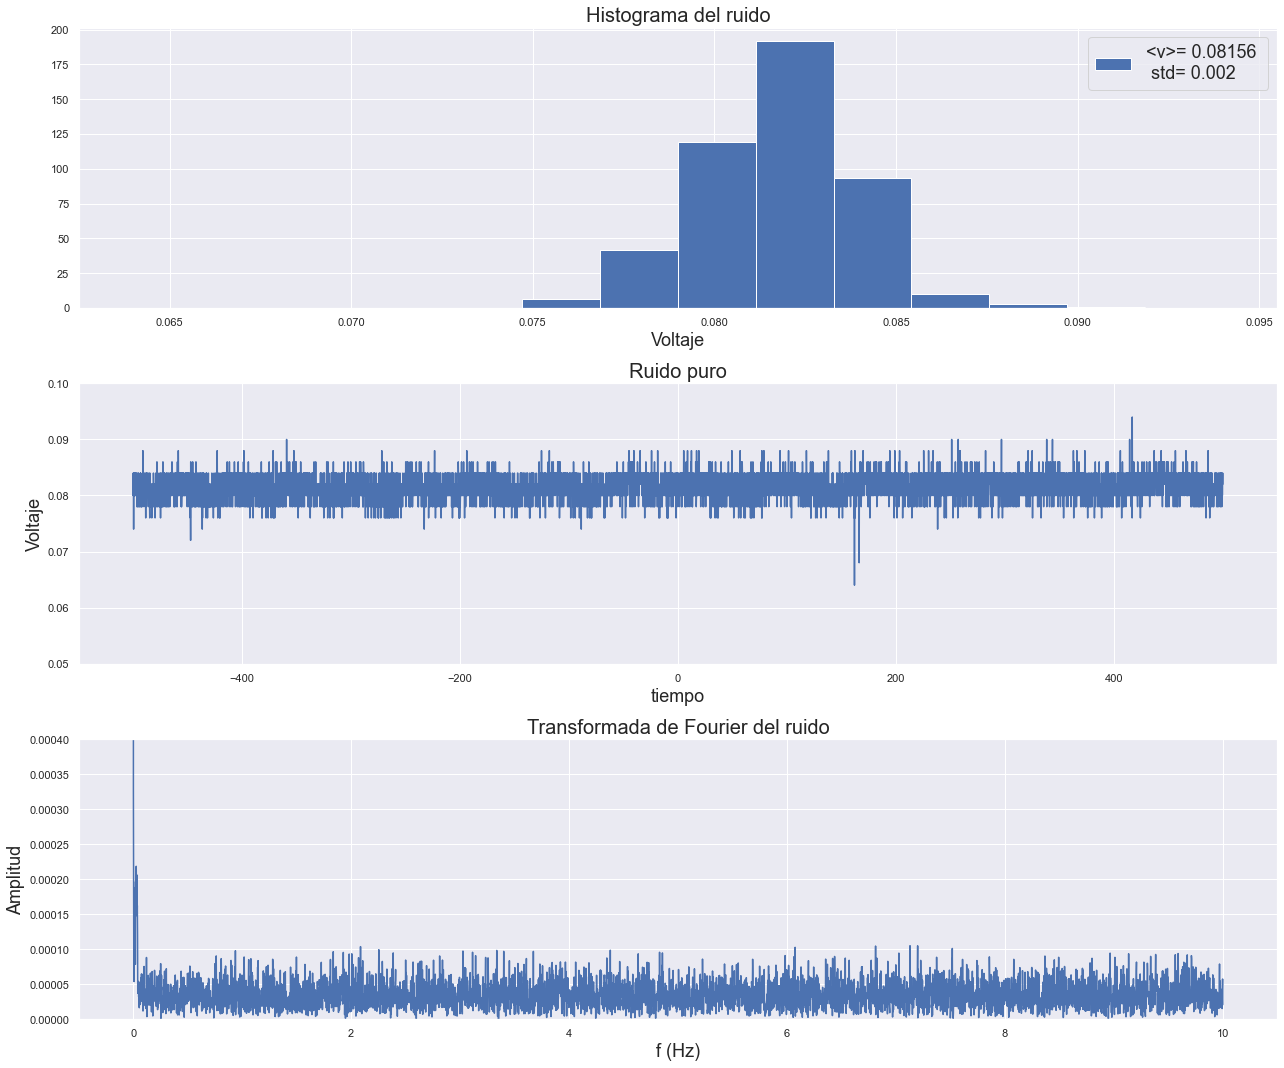

count    10000.000000
mean         0.081564
std          0.002068
min          0.064000
25%          0.080000
50%          0.082000
75%          0.082000
max          0.094000
Name: CH1, dtype: float64
count    10000.000000
mean         0.081564
std          0.002068
min          0.064000
25%          0.080000
50%          0.082000
75%          0.082000
max          0.094000
Name: CH1, dtype: float64


In [15]:
statistics_pseudotermica_100s_sin_ruido_ambiental, data_pseudotermica_100s_sin_ruido_ambiental = analisis("pseudotermica_100s_sin_ruido_ambiental.csv", 
                                                                                         bins=14, 
                                                                                         ylim_serie_temporal=(0.05,0.10), 
                                                                                         ylim_serie_frecuencias=(0,0.0004), 
                                                                                         )
print(statistics_pseudotermica_100s_sin_ruido_ambiental)

# Ruido ambiental

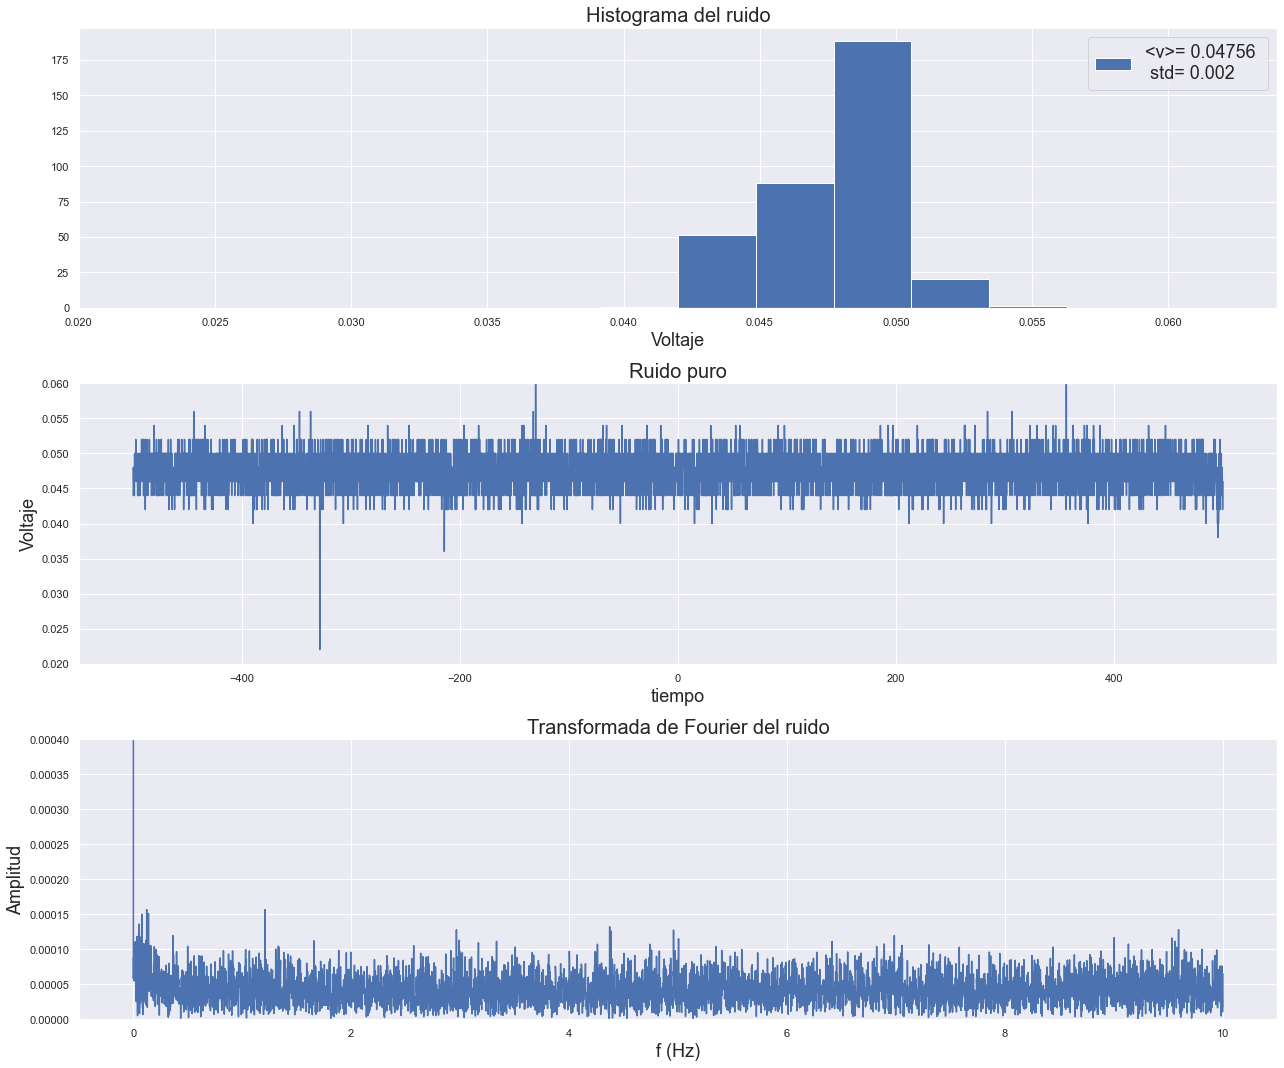

count    10000.000000
mean         0.047557
std          0.002395
min          0.022000
25%          0.046000
50%          0.048000
75%          0.050000
max          0.062000
Name: CH1, dtype: float64
count    10000.000000
mean         0.047557
std          0.002395
min          0.022000
25%          0.046000
50%          0.048000
75%          0.050000
max          0.062000
Name: CH1, dtype: float64


In [16]:
statistics_ruido_ambiental_100s, data_ruido_ambiental_100s = analisis("ruido_ambiental_100s.csv", 
                                                                                         bins=14, 
                                                                                         ylim_serie_temporal=(0.02,0.06), 
                                                                                         ylim_serie_frecuencias=(0,0.0004), 
                                                                                         )
print(statistics_ruido_ambiental_100s)

# Laser diodo con ruido ambiental.

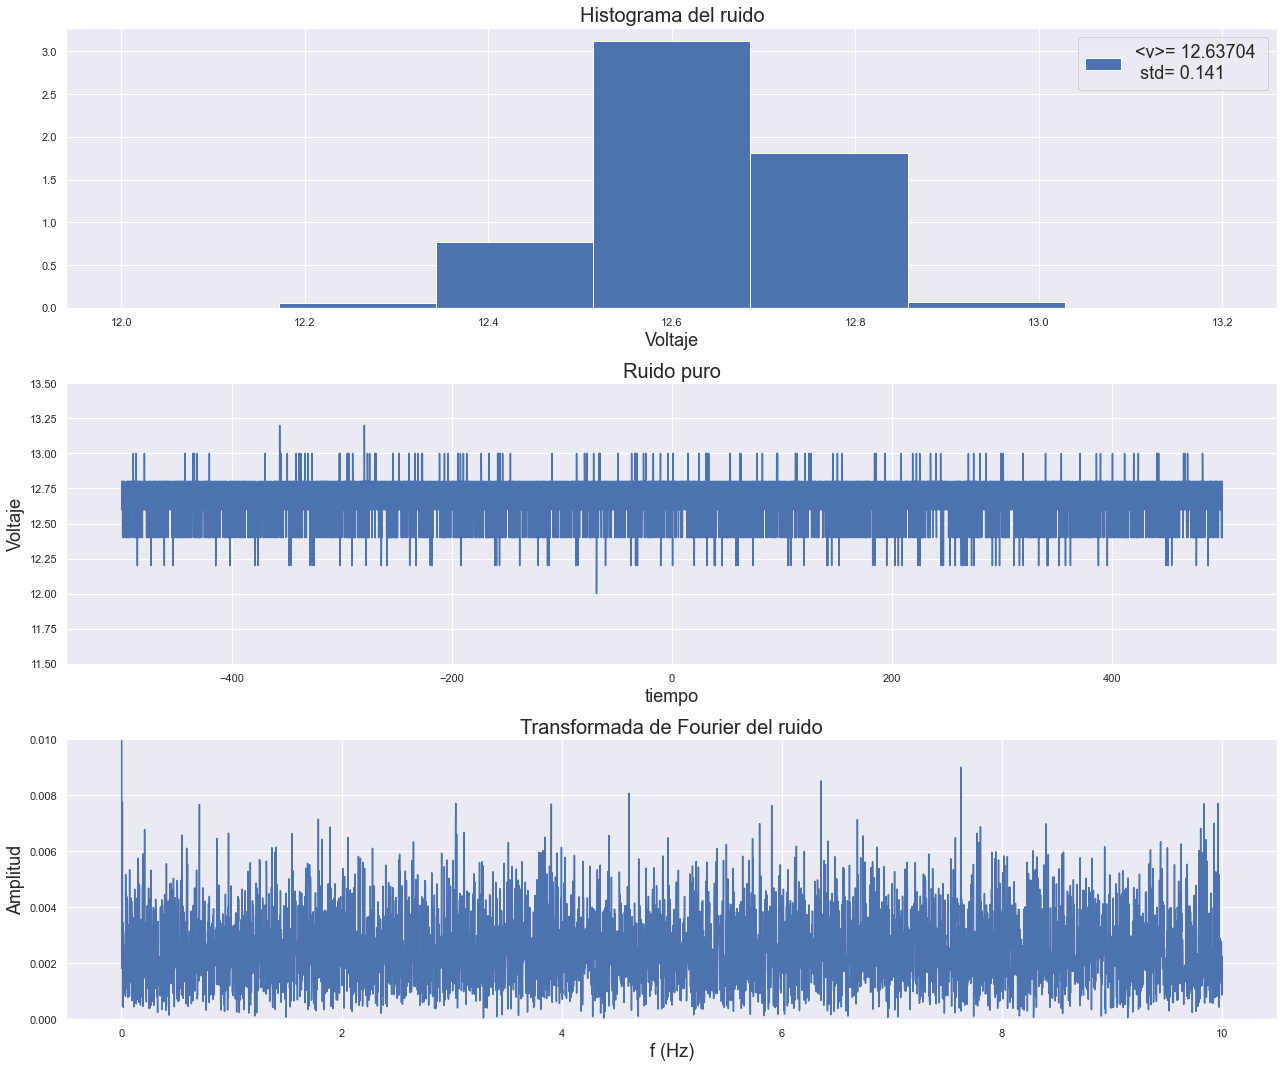

count    10000.00000
mean        12.63704
std          0.14133
min         12.00000
25%         12.60000
50%         12.60000
75%         12.80000
max         13.20000
Name: CH1, dtype: float64
count    10000.00000
mean        12.63704
std          0.14133
min         12.00000
25%         12.60000
50%         12.60000
75%         12.80000
max         13.20000
Name: CH1, dtype: float64


In [17]:
statistics_laser_diodo_100s_con_ruido_ambiental, data_laser_diodo_100s_con_ruido_ambiental = analisis("laser_diodo_100s_con_ruido_ambiental.csv", 
                                                                                         bins=7, 
                                                                                         ylim_serie_temporal=(11.5,13.5), 
                                                                                         ylim_serie_frecuencias=(0,0.01), 
                                                                                         )
print(statistics_laser_diodo_100s_con_ruido_ambiental)

# Laser diodo sin ruido ambiental.

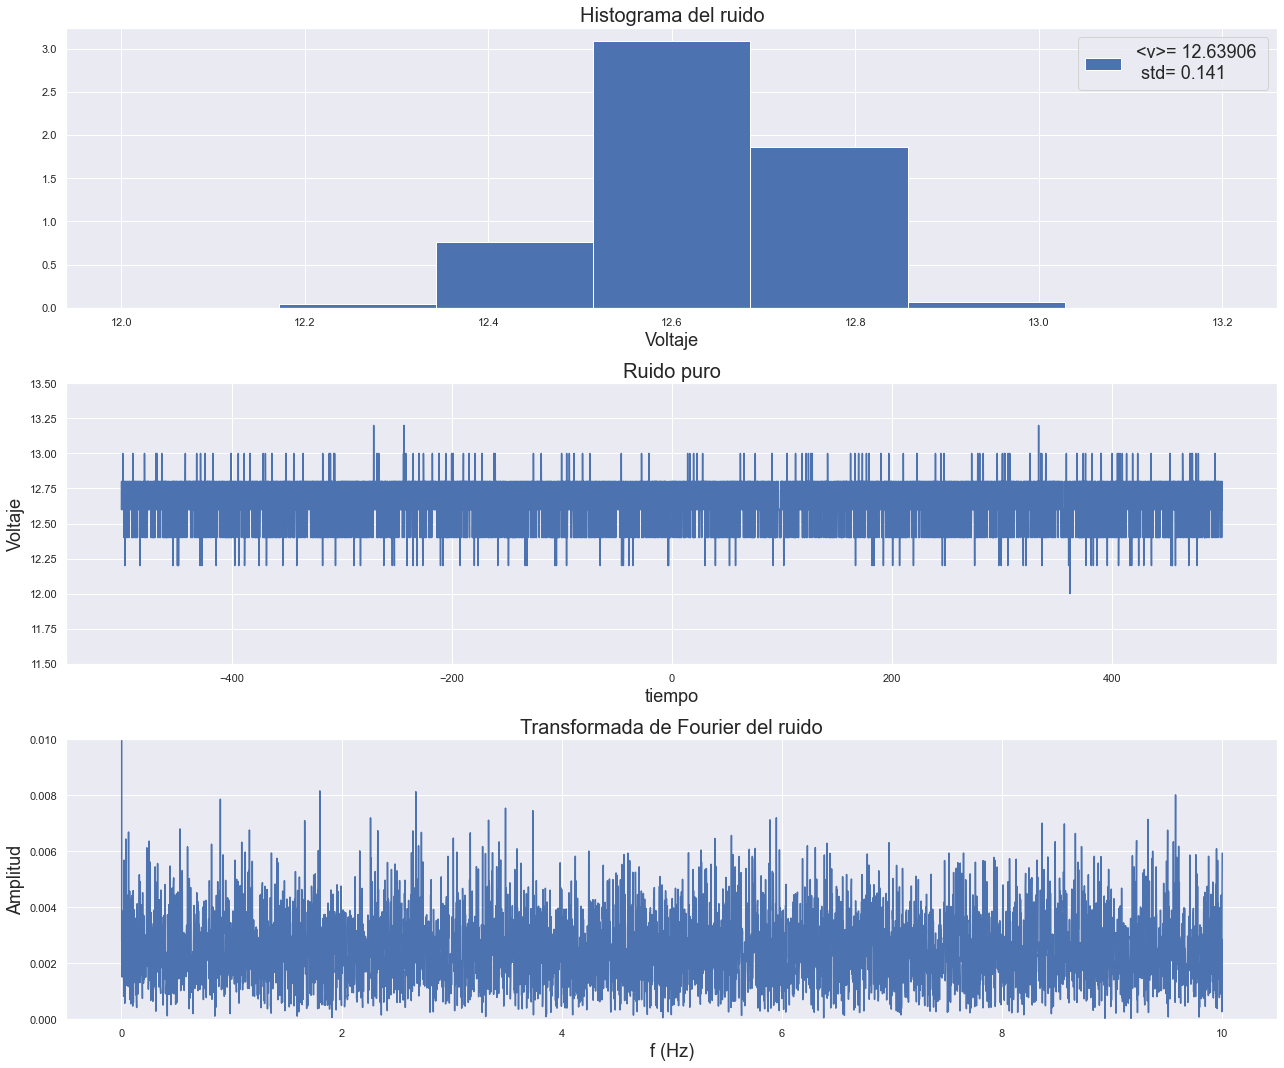

count    10000.000000
mean        12.639060
std          0.141451
min         12.000000
25%         12.600000
50%         12.600000
75%         12.800000
max         13.200000
Name: CH1, dtype: float64
count    10000.000000
mean        12.639060
std          0.141451
min         12.000000
25%         12.600000
50%         12.600000
75%         12.800000
max         13.200000
Name: CH1, dtype: float64


In [18]:
statistics_laser_diodo_100s_sin_ruido_ambiental, data_laser_diodo_100s_sin_ruido_ambiental = analisis("laser_diodo_100s_sin_ruido_ambiental.csv", 
                                                                                         bins=7, 
                                                                                         ylim_serie_temporal=(11.5,13.5), 
                                                                                         ylim_serie_frecuencias=(0,0.01), 
                                                                                         )
print(statistics_laser_diodo_100s_sin_ruido_ambiental)

# Led con ruido ambiental.

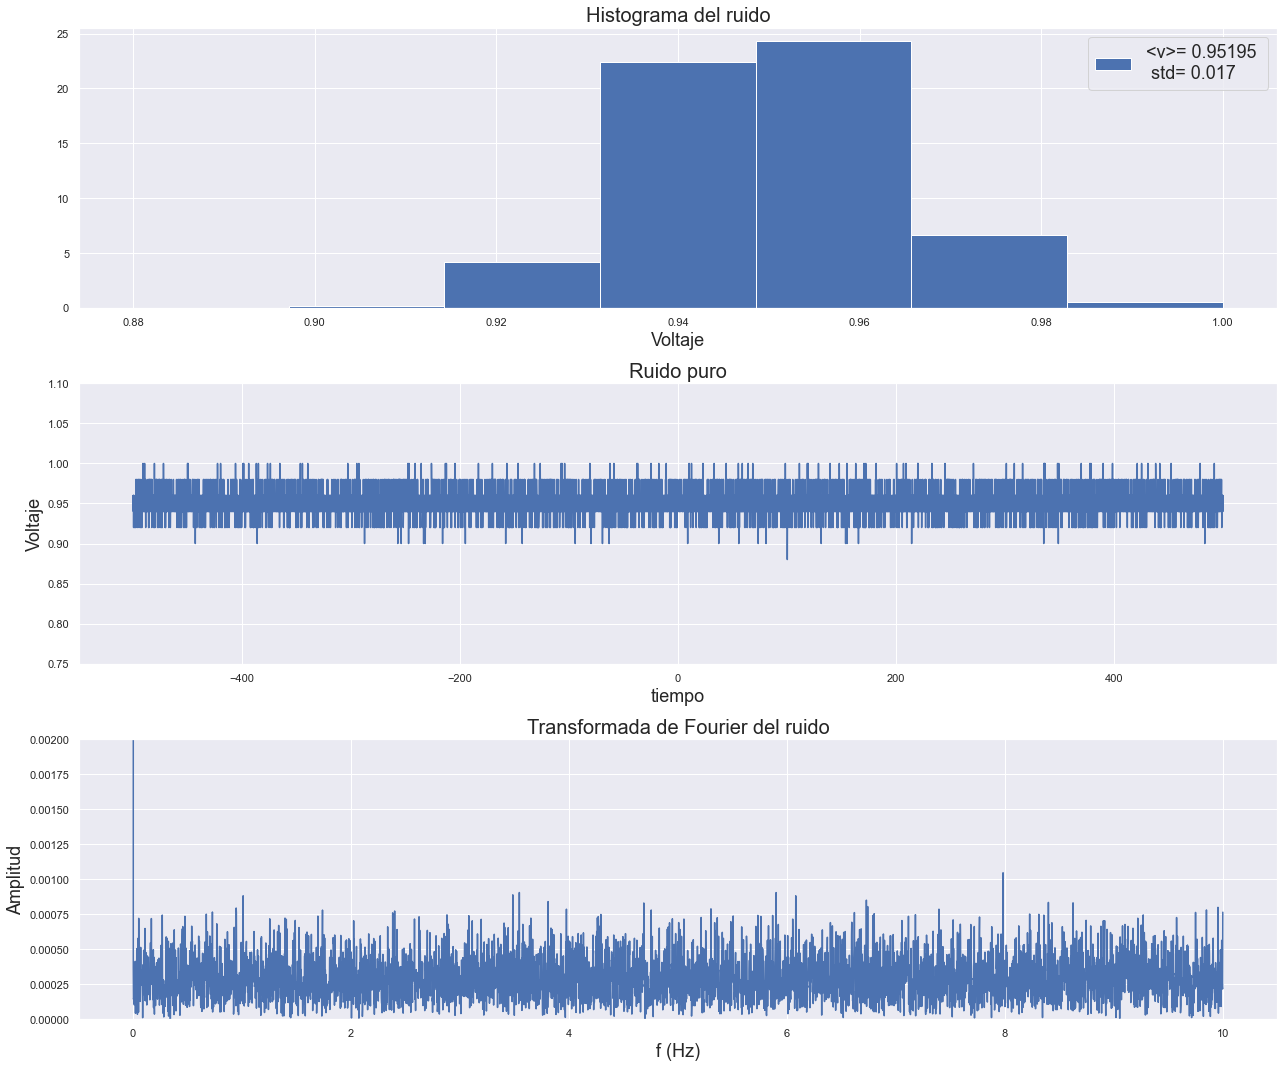

count    10000.000000
mean         0.951950
std          0.016622
min          0.880000
25%          0.940000
50%          0.960000
75%          0.960000
max          1.000000
Name: CH1, dtype: float64
count    10000.000000
mean         0.951950
std          0.016622
min          0.880000
25%          0.940000
50%          0.960000
75%          0.960000
max          1.000000
Name: CH1, dtype: float64


In [19]:
statistics_led_rojo_100s_con_ruido_ambiental, data_led_rojo_100s_con_ruido_ambiental = analisis("led_rojo_100s_con_ruido_ambiental.csv", 
                                                                                         bins=7, 
                                                                                         ylim_serie_temporal=(0.75,1.1), 
                                                                                         ylim_serie_frecuencias=(0,0.002), 
                                                                                         )
print(statistics_led_rojo_100s_con_ruido_ambiental)

# Led sin ruido ambiental.

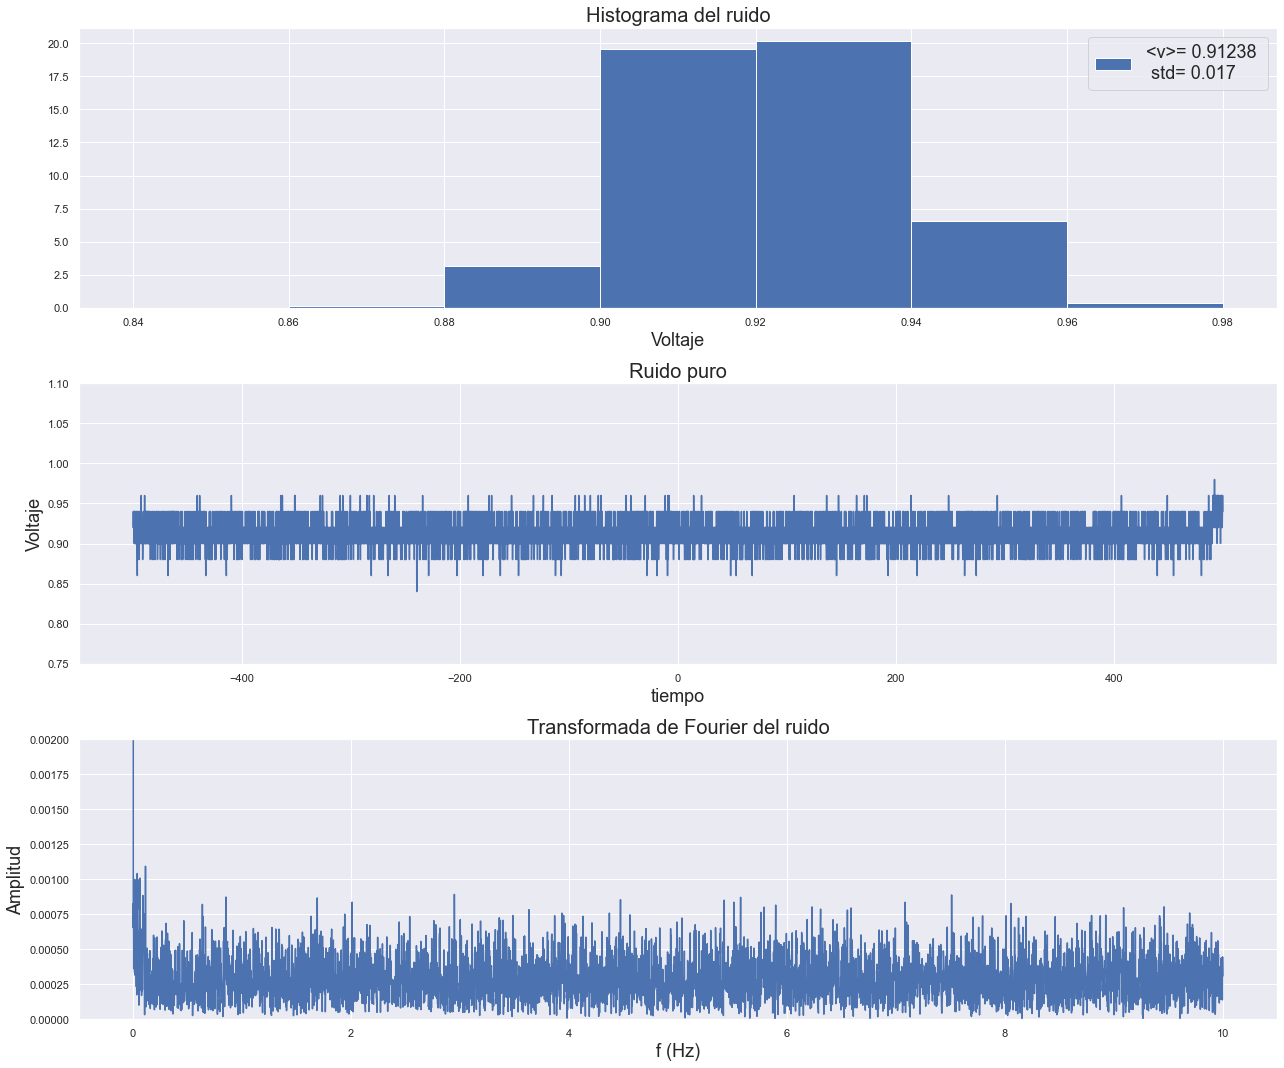

count    10000.000000
mean         0.912382
std          0.016605
min          0.840000
25%          0.900000
50%          0.920000
75%          0.920000
max          0.980000
Name: CH1, dtype: float64
count    10000.000000
mean         0.912382
std          0.016605
min          0.840000
25%          0.900000
50%          0.920000
75%          0.920000
max          0.980000
Name: CH1, dtype: float64


In [20]:
statistics_led_rojo_100s_sin_ruido_ambiental, data_led_rojo_100s_sin_ruido_ambiental = analisis("led_rojo_100s_sin_ruido_ambiental.csv", 
                                                                                         bins=7, 
                                                                                         ylim_serie_temporal=(0.75,1.1), 
                                                                                         ylim_serie_frecuencias=(0,0.002), 
                                                                                         )
print(statistics_led_rojo_100s_sin_ruido_ambiental)

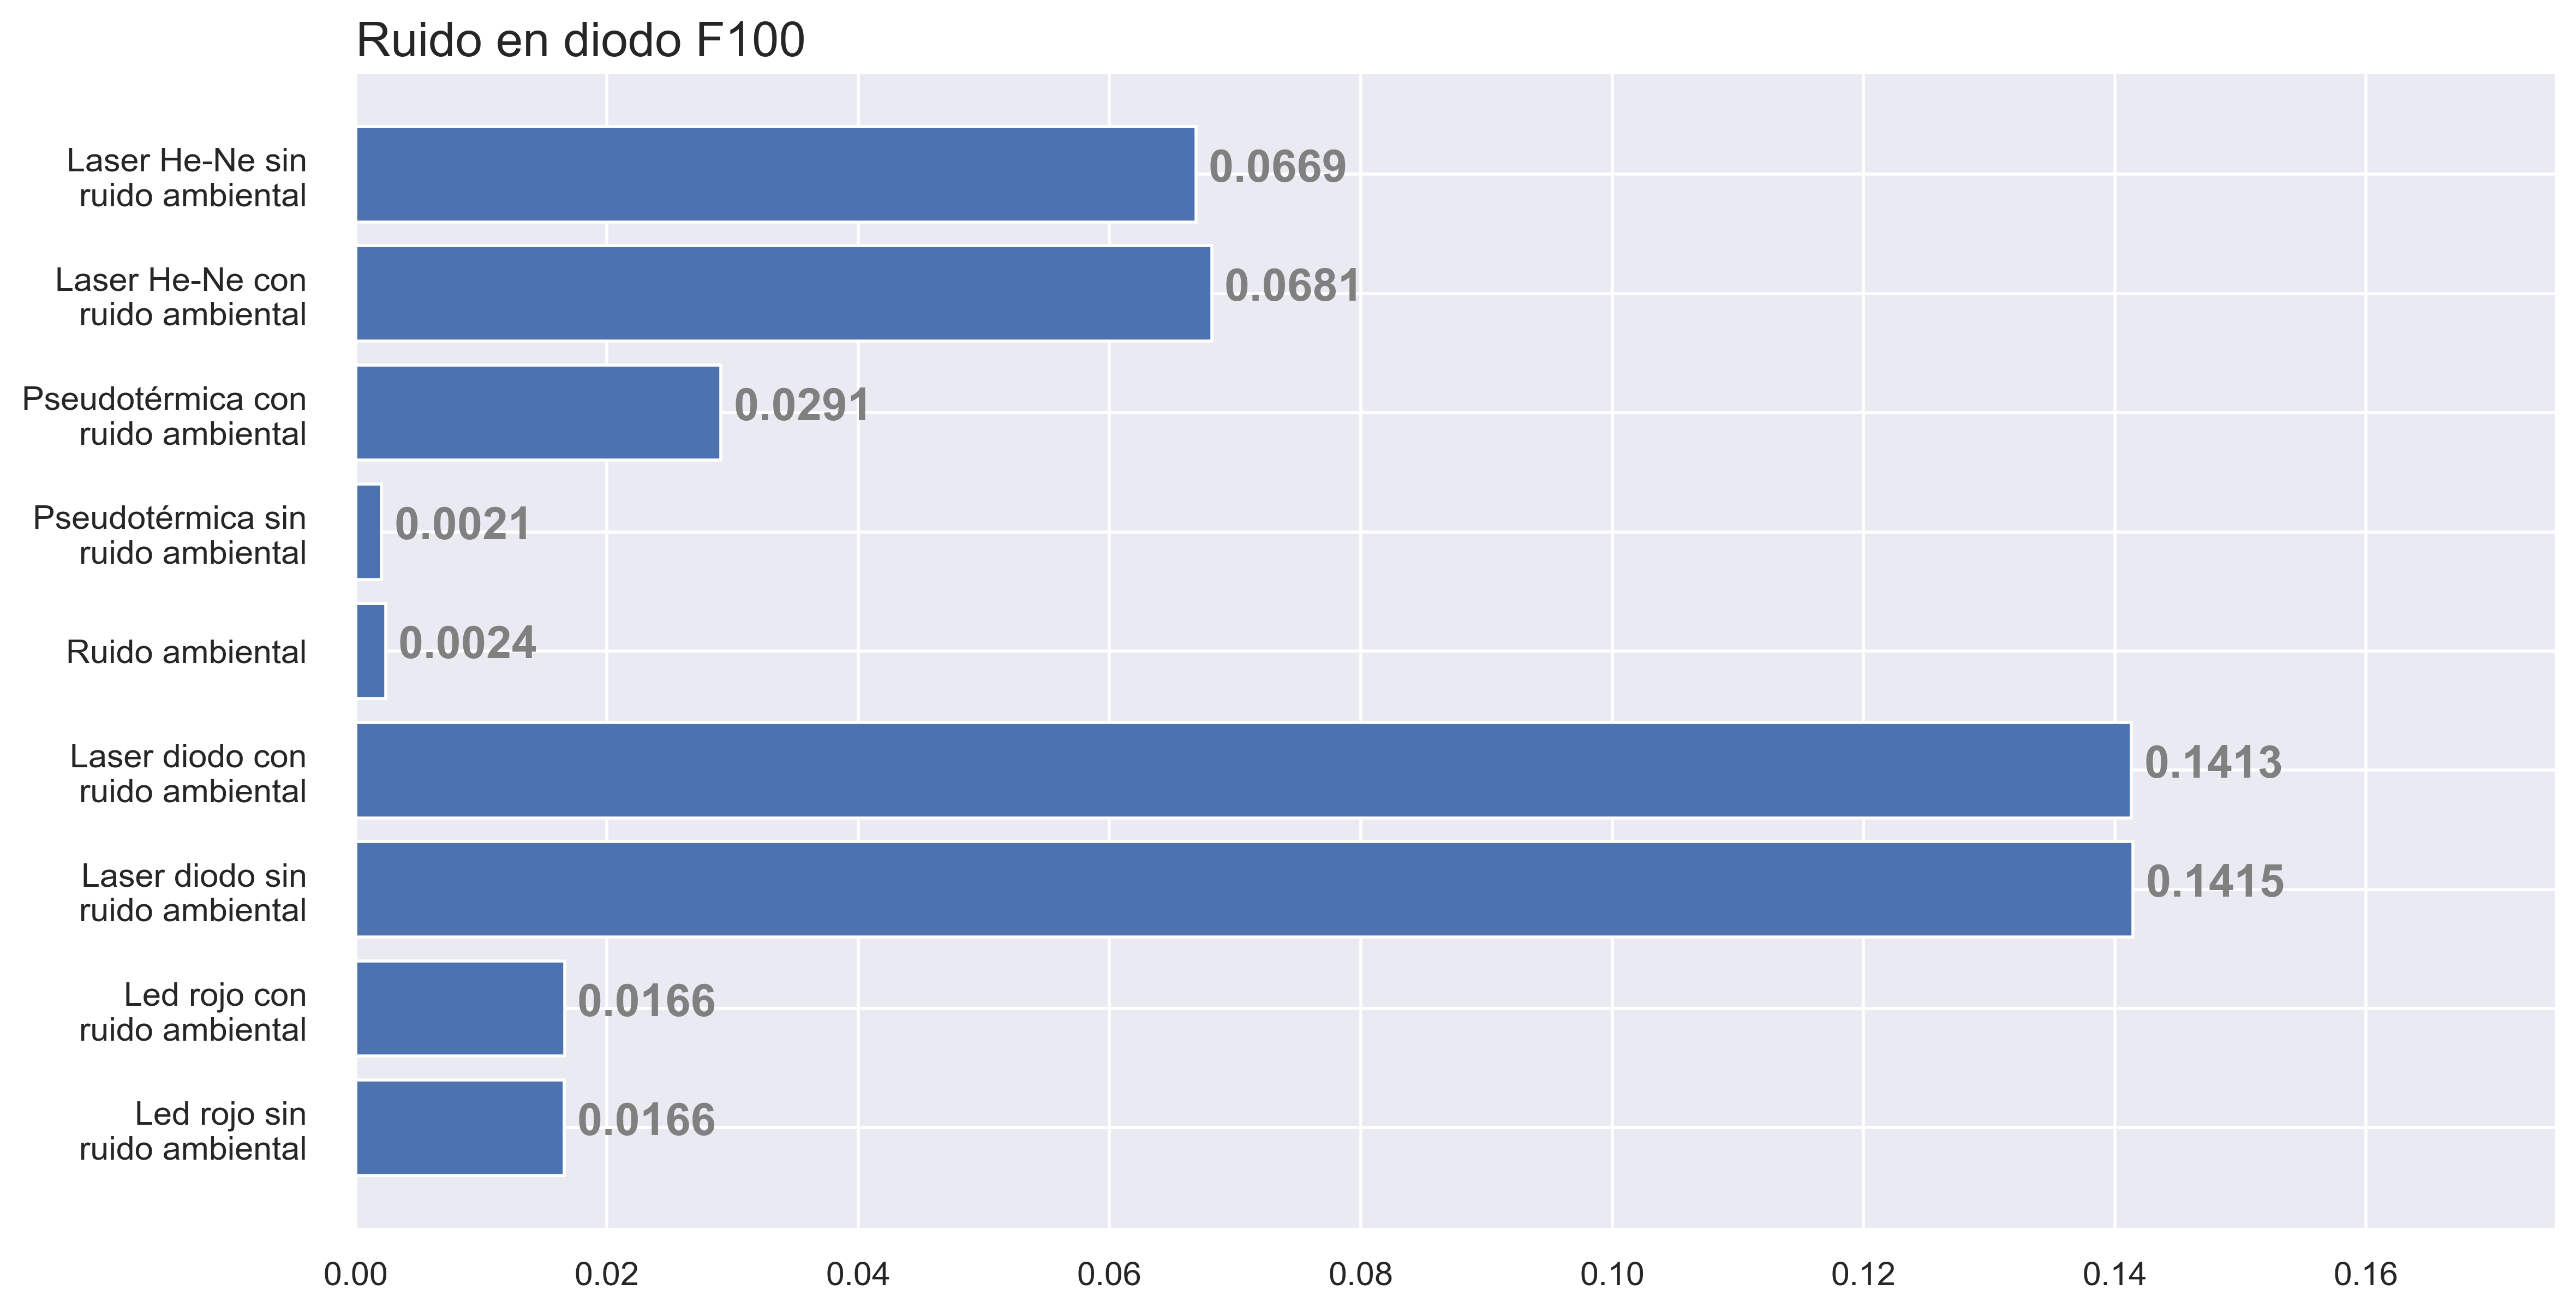

In [21]:
#data = pd.read_csv(r"cars.csv")
#data.head()
#df = pd.DataFrame(data)

name = ["Laser He-Ne sin\n ruido ambiental", 
        "Laser He-Ne con\n ruido ambiental", 
        "Pseudotérmica con\n ruido ambiental",
        "Pseudotérmica sin\n ruido ambiental",
        "Ruido ambiental",
        "Laser diodo con\n ruido ambiental",
        "Laser diodo sin\n ruido ambiental",
        "Led rojo con\n ruido ambiental",
        "Led rojo sin\n ruido ambiental"
       ]
desviaciones_estandar = [
                         statistics_he_ne_100s_sin_ruido_ambiental["std"], 
                         statistics_he_ne_100s_con_ruido_ambiental["std"],
                         statistics_pseudotermica_100s_con_ruido_ambiental["std"],
                         statistics_pseudotermica_100s_sin_ruido_ambiental["std"],
                         statistics_ruido_ambiental_100s["std"],
                         statistics_laser_diodo_100s_con_ruido_ambiental["std"],
                         statistics_laser_diodo_100s_sin_ruido_ambiental["std"],
                         statistics_led_rojo_100s_con_ruido_ambiental["std"],
                         statistics_led_rojo_100s_sin_ruido_ambiental["std"]
                        ]

fig, ax = plt.subplots(figsize =(13, 7))
# Horizontal Bar Plot
ax.barh(name, desviaciones_estandar)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
#ax.grid(b = True, color ='grey',
#        linestyle ='-.', linewidth = 0.5,
#        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.001, i.get_y()+0.46,
             str(round((i.get_width()), 4)),
             fontsize = 15, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_xlim(0,0.175)
ax.set_title('Ruido en diodo F100',
             loc ='left', 
             fontsize=16
            )
fig.set_dpi(400)
plt.savefig("desviaciones_estandar.png")
# Add Text watermark
#fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12,
#         color ='grey', ha ='right', va ='bottom',
#         alpha = 0.7)
 
# Show Plot
plt.show()

In [29]:
prueba=np.array(data_led_rojo_100s_sin_ruido_ambiental["CH1"])

(0.86, 0.94)

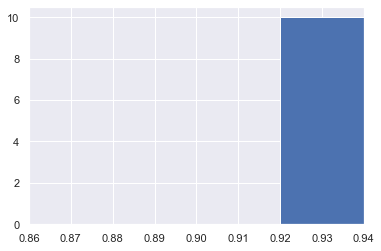

In [45]:
plt.figure()
plt.hist(prueba[(prueba >0.90) & (prueba < 0.94)], bins=10, density=True)
plt.xlim(0.86,0.94)

In [46]:
datos=data_led_rojo_100s_sin_ruido_ambiental

(0.0, 50.0)

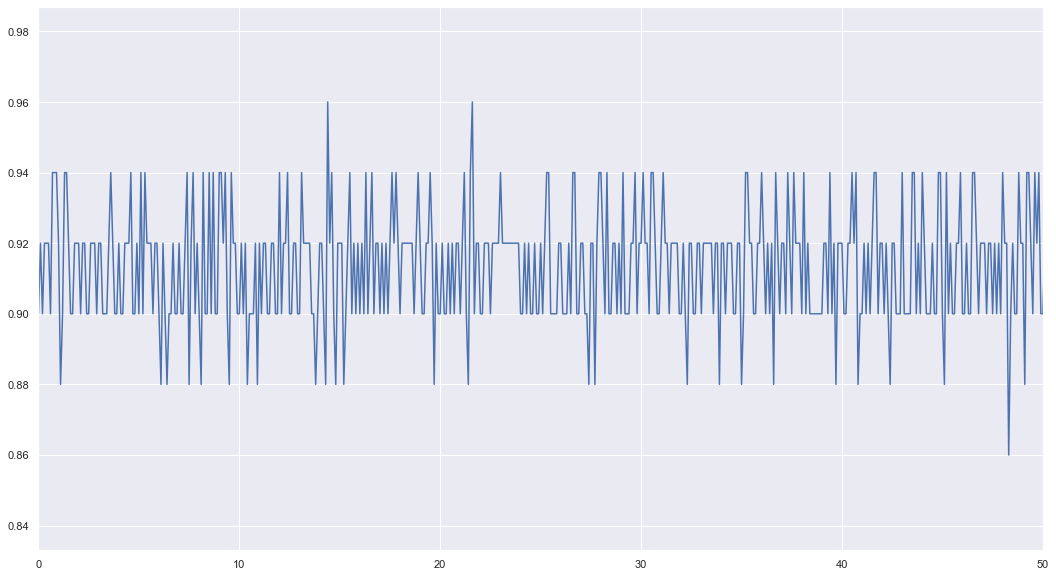

In [51]:
plt.figure(figsize=(18,10))
plt.plot(datos["TIME"], datos["CH1"])
plt.xlim(0,50)

In [53]:
data_led_rojo_100s_sin_ruido_ambiental["CH1"].value_counts()

0.92    4032
0.90    3919
0.94    1308
0.88     635
0.96      77
0.86      27
0.84       1
0.98       1
Name: CH1, dtype: int64